Determining what study habits indepedantly have a significant effect on exam score. Using Linear Regression and Random Forest Regression and determining what regression fits the data best.

Findings:
1. We found that, while mental health rating, netflix hours per day, and social media hours per day have weak correlations with exam score, only study hours has a significant effect on exam scores assuming all other variables are constant.

2. The linear reggression was a better model for the data prediction than a random forrest regression



##Data Loading

In [92]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-habits-vs-academic-performance' dataset.
Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


In [93]:
import pandas as pd
import numpy as np


In [94]:
df = pd.read_csv("/content/student_habits_performance.csv")


## Cleaning and Encoding

In [95]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [96]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [97]:
gender_map = {"Male": 0, "Female": 1, "Other": 2}
cols = ["gender"]
for col in cols:
    df[col] = df[col].map(gender_map)

yn_map = {"No": 0, "Yes": 1}
yncols = ["part_time_job", "extracurricular_participation"]
for col in yncols:
    df[col] = df[col].map(yn_map)

diet_map = {"Poor": 0, "Fair": 1, "Good": 2}
dcols = ["diet_quality"]
for col in dcols:
  df[col] = df[col].map(diet_map)

p_map = {"High School": 0, "Bachelor": 1, "Master": 2}
pcols = ["parental_education_level"]
for col in pcols:
  df[col] = df[col].map(p_map)

i_map = {"Poor": 0 , "Average": 1, "Good": 2}
icols = ["internet_quality"]
for col in icols:
  df[col] = df[col].map(i_map)


In [98]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,1,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
1,S1001,20,1,6.9,2.8,2.3,0,97.3,4.6,2,6,0.0,1,8,0,100.0
2,S1002,21,0,1.4,3.1,1.3,0,94.8,8.0,0,1,0.0,0,1,0,34.3
3,S1003,23,1,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
4,S1004,19,1,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4


#Exploratory Data Analysis

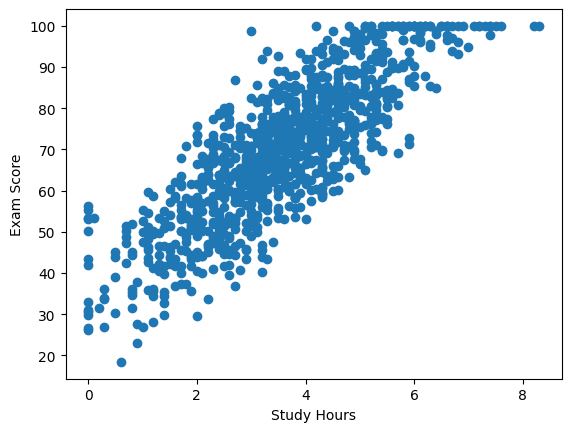

In [99]:
import matplotlib.pyplot as plt

plt.scatter(df["study_hours_per_day"], df["exam_score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()


Displays strong postive linear relationship between exam score and study hours per day

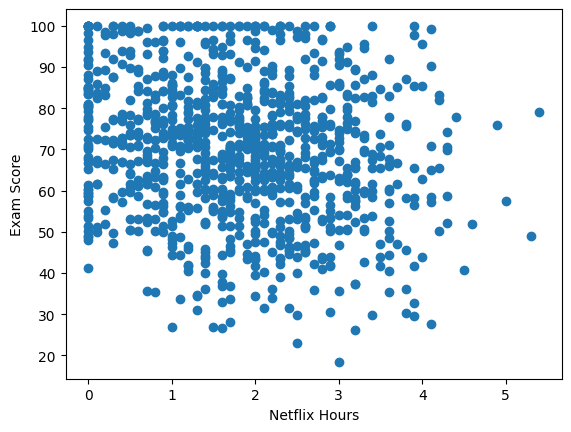

In [100]:

plt.scatter(df["netflix_hours"], df["exam_score"])
plt.xlabel("Netflix Hours")
plt.ylabel("Exam Score")
plt.show()

Displays a week negative linear relationship between exam score and Netflix hours

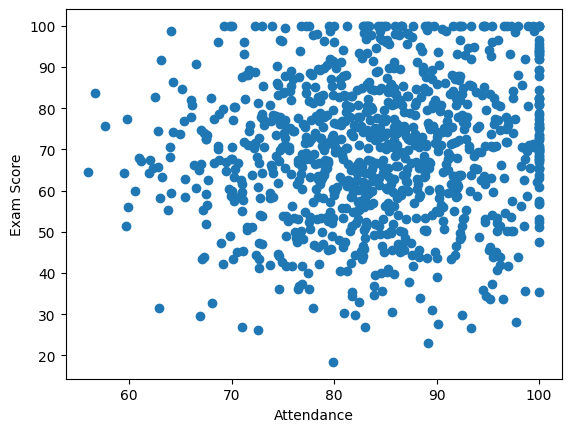

In [101]:
plt.scatter(df["attendance_percentage"], df["exam_score"])
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.show()

Displays a weak postive linear relationship between exam score and attendance

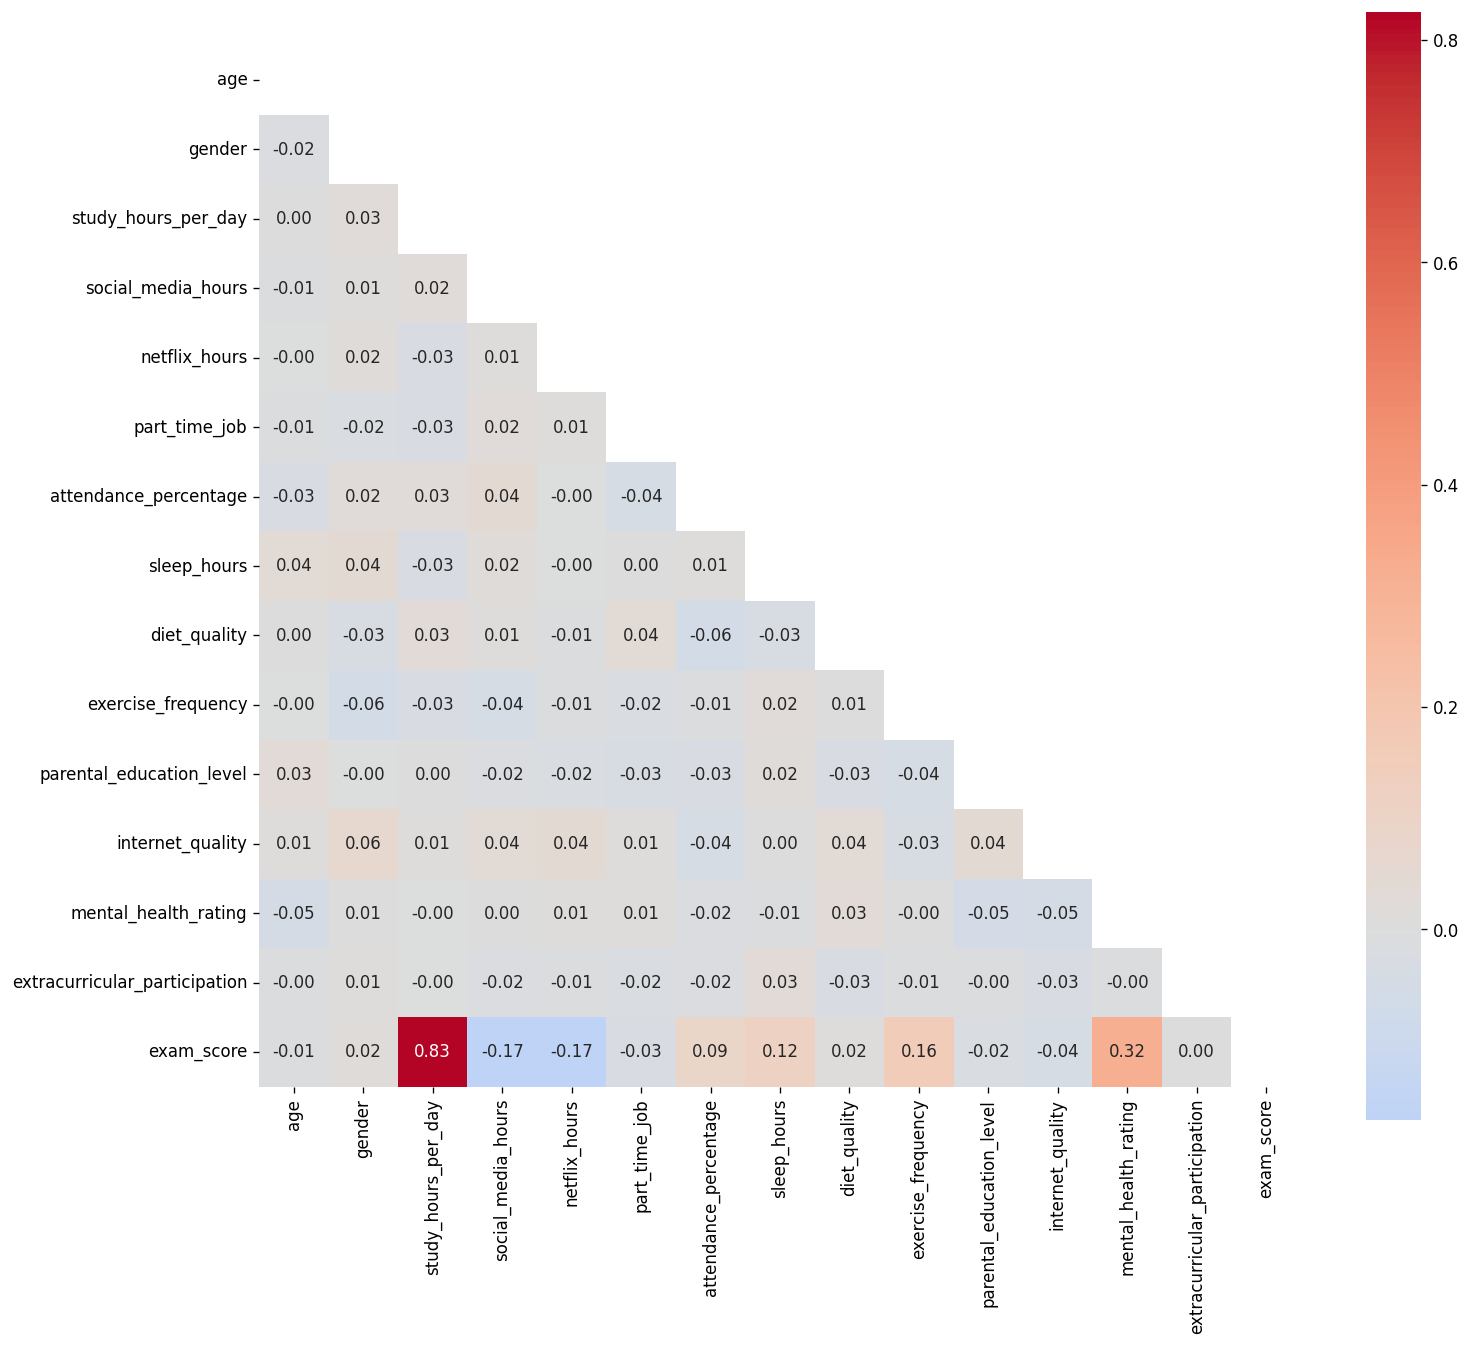

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 12), dpi=120)

sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    square=True
)
plt.show()

Notable observations:

Study hours per day and exam score: Strong postive correlation

Mental health rating and exam score: Medium postive correlation

Social media hours and exam score: Weak negative correlation

Netflix hour and exam score: Weak negative correlation

In [103]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,1,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
1,S1001,20,1,6.9,2.8,2.3,0,97.3,4.6,2,6,0.0,1,8,0,100.0
2,S1002,21,0,1.4,3.1,1.3,0,94.8,8.0,0,1,0.0,0,1,0,34.3
3,S1003,23,1,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
4,S1004,19,1,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4


## Feature Selection
Threshold of |r| = 0.17 chosen to determine features.

In [104]:
features = ["study_hours_per_day", "mental_health_rating", "netflix_hours", "social_media_hours"]
target = "exam_score"
X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 47.82563461473749
R²: 0.813493728438923


In [107]:
for f, c in zip(features, model.coef_):
    print(f, c)


study_hours_per_day 9.459268293139894
mental_health_rating 1.961510898413703
netflix_hours -2.328470794960301
social_media_hours -2.7450846255232757


## Linear Model Error Exploring

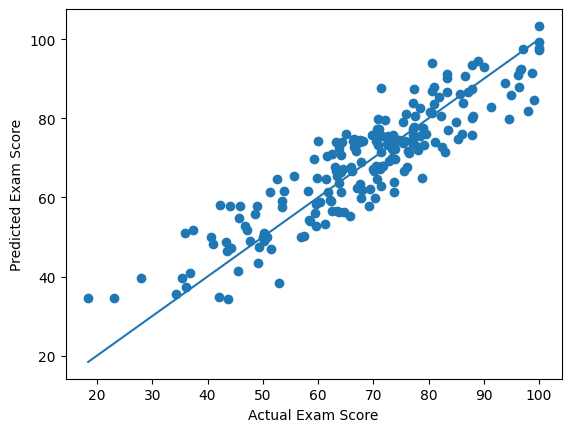

In [108]:


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()


Displays predicted exam score vs actual exam score. Points are clustered closly to the line suggesting strong linear fit with no patterns that might suggest otherwise.

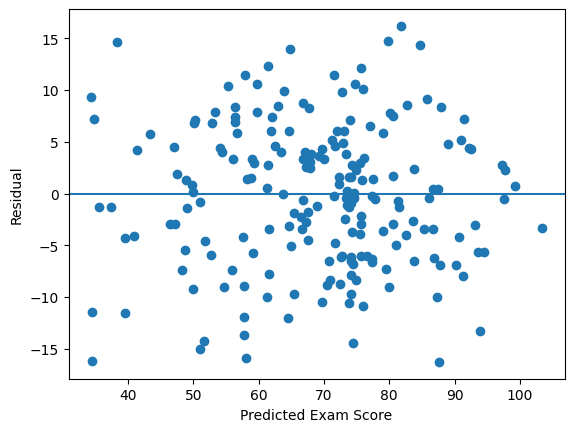

In [109]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residual")
plt.show()


Residual plot with no strong skew or pattern supporting strong linear assumption.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

##Random Forrest Regression

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state =42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [112]:
print("Linear R²:", r2_score(y_test, y_pred))
print("RF R²:", r2_score(y_test, rf_pred))
print("RF MSE:", mean_squared_error(y_test, rf_pred))


Linear R²: 0.813493728438923
RF R²: 0.7845096373901856
RF MSE: 55.25799888074689


##Conclusion

Determining what varibles independently have strong effects on exam score when other varibles are held constant.

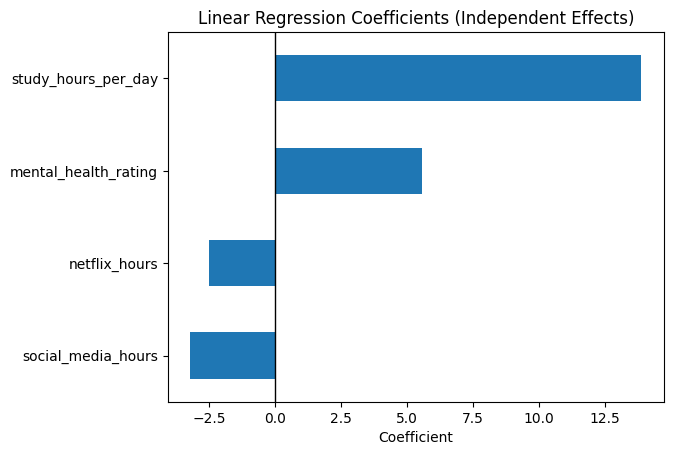

In [116]:
coefficients = pd.Series(model.coef_, index=features)
plt.axvline(0, color="black", linewidth=1)
coefficients.sort_values().plot(kind="barh")
plt.title("Linear Regression Coefficients (Independent Effects)")
plt.xlabel("Coefficient")
plt.show()

Conclusion: When analyzing the regression coefficient graph above, we observe that study hours per day has the greatest effect on exam score when other features are held constant. Mental health, social media hours, and Netflix hours have weaker coefficients but are retained to control for confounding variables and capture additional trends.